# Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Resources/05-Seaborn/dm_office_sales.csv')
df.head(2)

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660


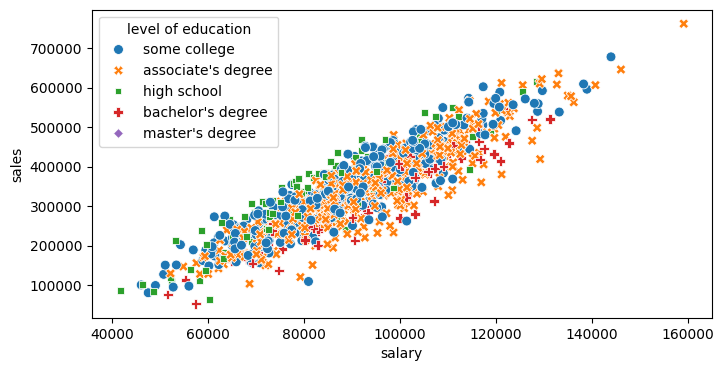

In [19]:
plt.figure(figsize=(8, 4))
# sns.scatterplot(x='salary', y='sales', data=df,  size='work experience', s=2, alpha=.5)
# sns.scatterplot(x='salary', y='sales', data=df, hue='training level', palette='viridis', size='work experience')
sns.scatterplot(x='salary', y='sales', data=df,  style='level of education', hue='level of education', s=50, alpha=1)
plt.show()

In [20]:
df.head(1)

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302


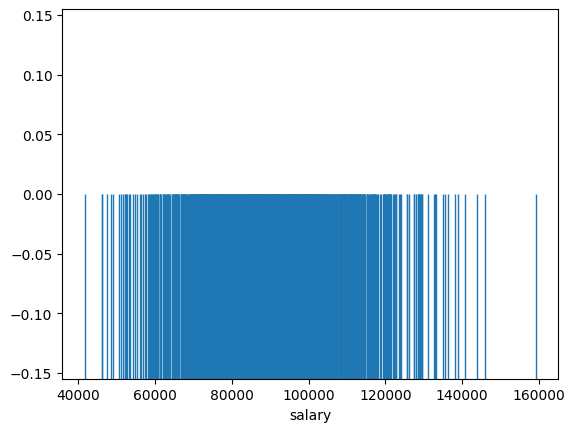

In [23]:
sns.rugplot(x='salary', data=df, height=.5)
plt.show()

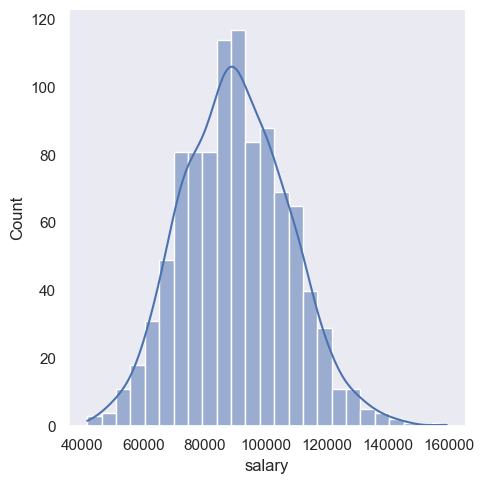

In [36]:
sns.set(style='dark')
# sns.distplot( x=df['salary'])
sns.displot(x=df['salary'], bins=25, kde=True)
# sns.histplot()
plt.show()

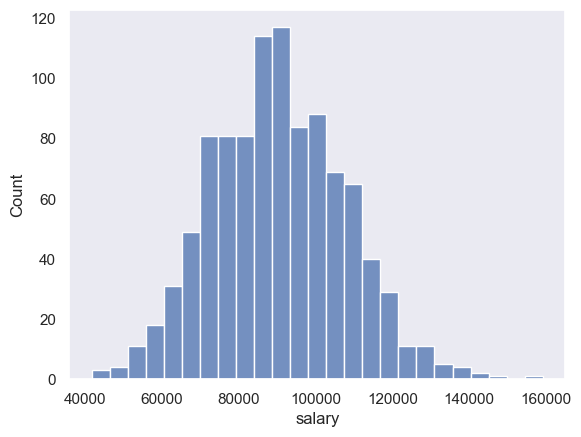

In [31]:
sns.histplot(x=df['salary'])
plt.show()

In [38]:
ages=np.random.randint(0, 100, 200)

In [39]:
sample_ages=pd.DataFrame(ages, columns=['Age'])
sample_ages.head(2)

,Age
0,45
1,4


<Axes: xlabel='Age'>

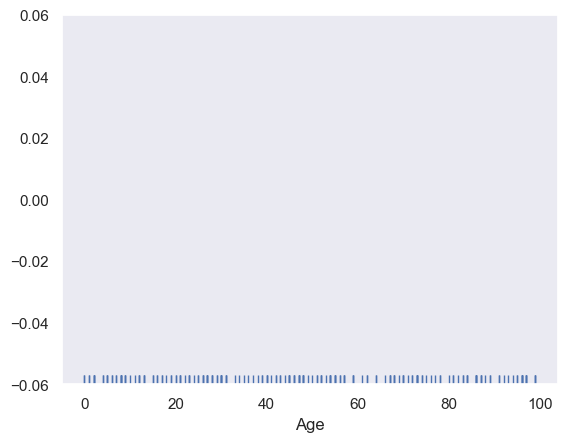

In [40]:
sns.rugplot(x=sample_ages['Age'])
plt.show()

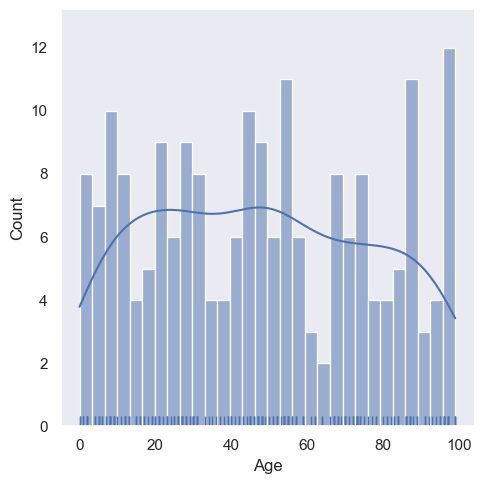

In [48]:
sns.displot(x=sample_ages['Age'], bins=30, rug=True, kde=True)
plt.show()

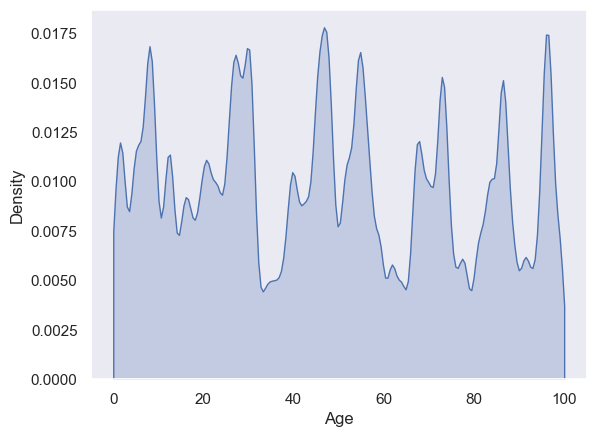

In [60]:
sns.kdeplot(x=sample_ages['Age'], clip=[0, 100], bw_adjust=0.1, fill=True)
plt.show()

# Categorical plots

In [61]:
df.division.value_counts()

division
office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: count, dtype: int64

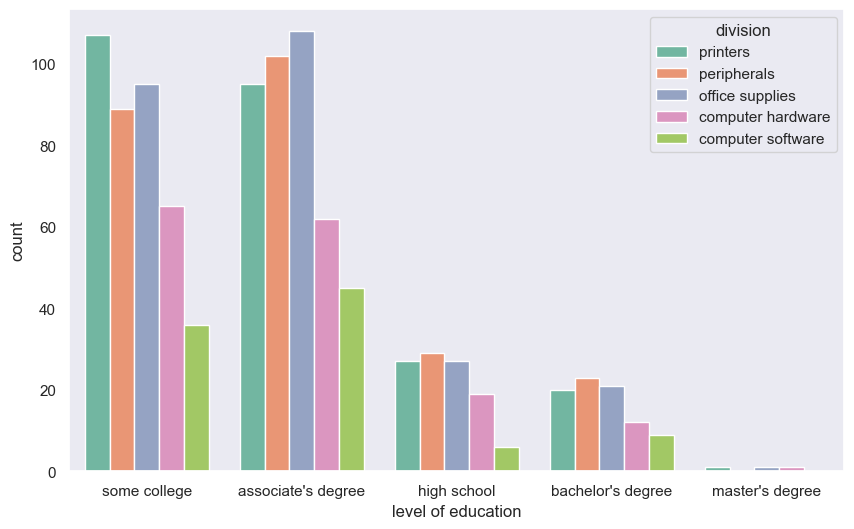

In [72]:
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x=df['level of education'], hue=df['division'], palette='Set2')
plt.show()

In [68]:
df['level of education'].value_counts()

level of education
associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: count, dtype: int64

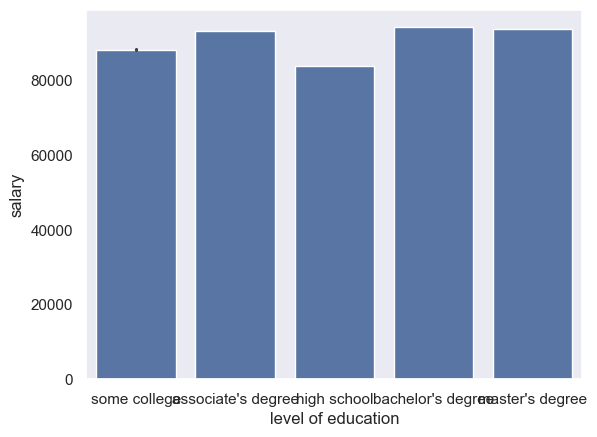

In [74]:
sns.barplot(x=df['level of education'], y=df['salary'], estimator=np.mean, errorbar=('ci',.98))
plt.show()

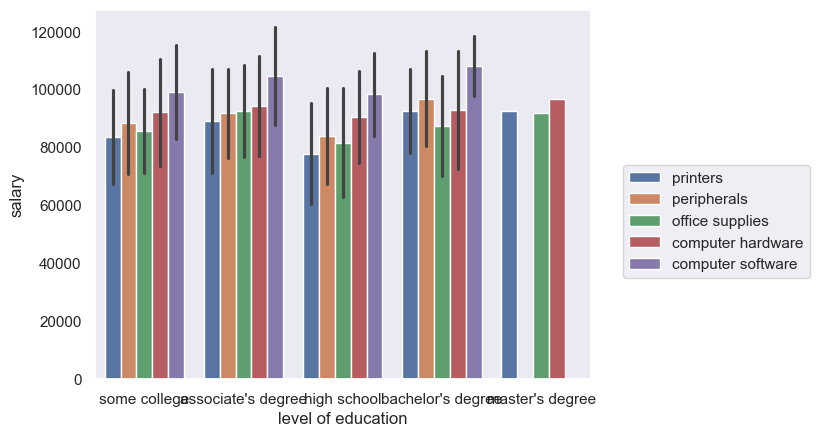

In [79]:
sns.barplot(x=df['level of education'], y=df['salary'], estimator=np.mean, errorbar='sd', hue=df['division'])
plt.legend(bbox_to_anchor=(1.05, 0.6))
plt.show()

# Box plot

In [89]:
df1 = pd.read_csv('Resources/05-Seaborn/StudentsPerformance.csv')
df1.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


<Figure size 800x400 with 0 Axes>

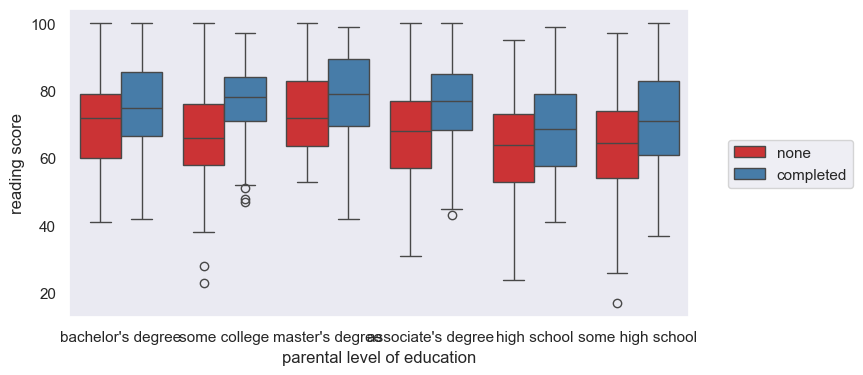

In [92]:
plt.figure(figsize=(8, 4), dpi=100)
sns.boxplot(y=df1['reading score'], x=df1['parental level of education'], hue=df1['test preparation course'], palette='Set1')
plt.legend(bbox_to_anchor=(1.05, .6))
plt.show()

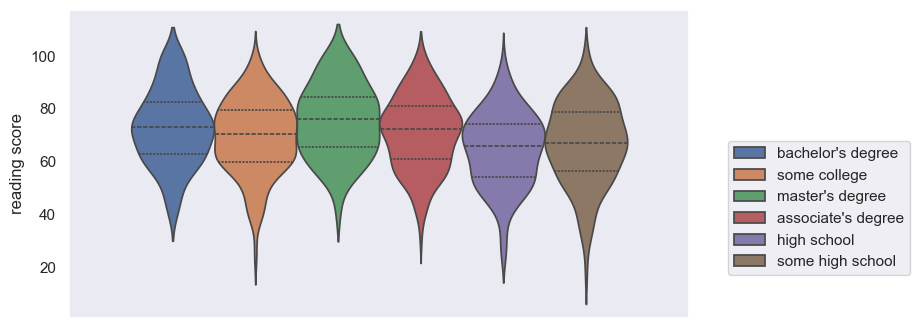

In [100]:
plt.figure(figsize=(8, 4), dpi=100)
sns.violinplot(y=df1['reading score'], hue=df1['parental level of education'], inner='quartile')
plt.legend(bbox_to_anchor=(1.05, .6))
plt.show()

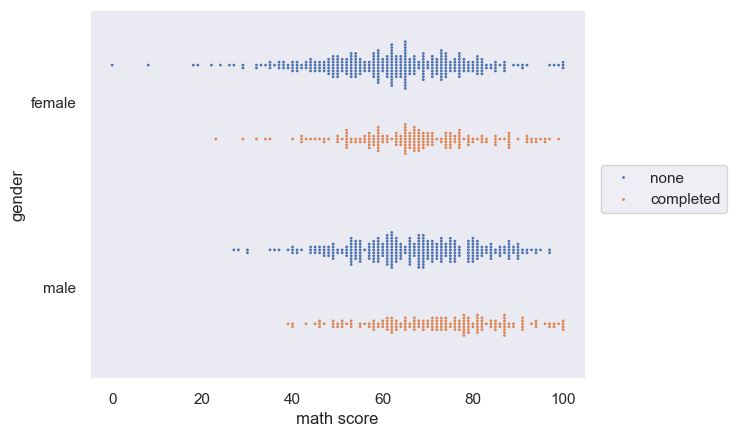

In [109]:
sns.swarmplot(x=df1['math score'], y=df1['gender'], size=2, hue=df1['test preparation course'], dodge=True)
plt.legend(bbox_to_anchor=(1.3, 0.6))
plt.show()

<Axes: xlabel='math score', ylabel='test preparation course'>

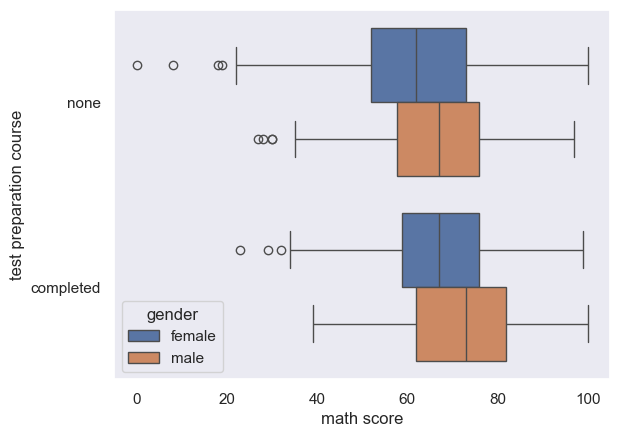

In [112]:
sns.boxplot(x=df1['math score'], y=df1['test preparation course'], hue=df1.gender)

# Comparison plots

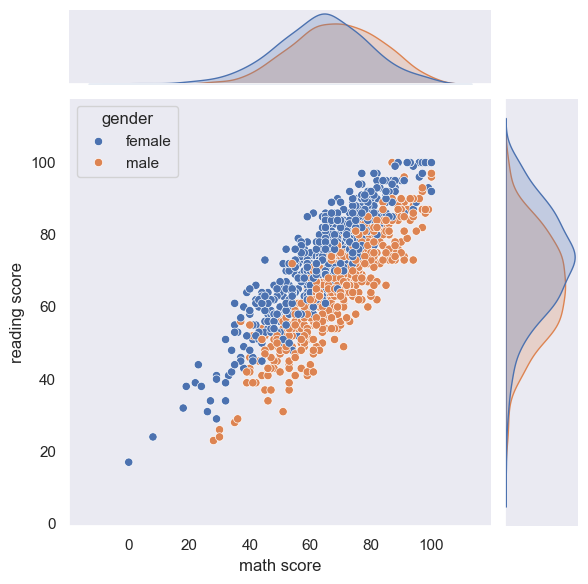

In [132]:
# sns.jointplot(data=df1, x='math score', y='reading score', kind='hex')
# sns.jointplot(data=df1, x='math score', y='reading score', kind='scatter', alpha=.4)
sns.jointplot(data=df1, x='math score', y='reading score', hue='gender')
plt.show()

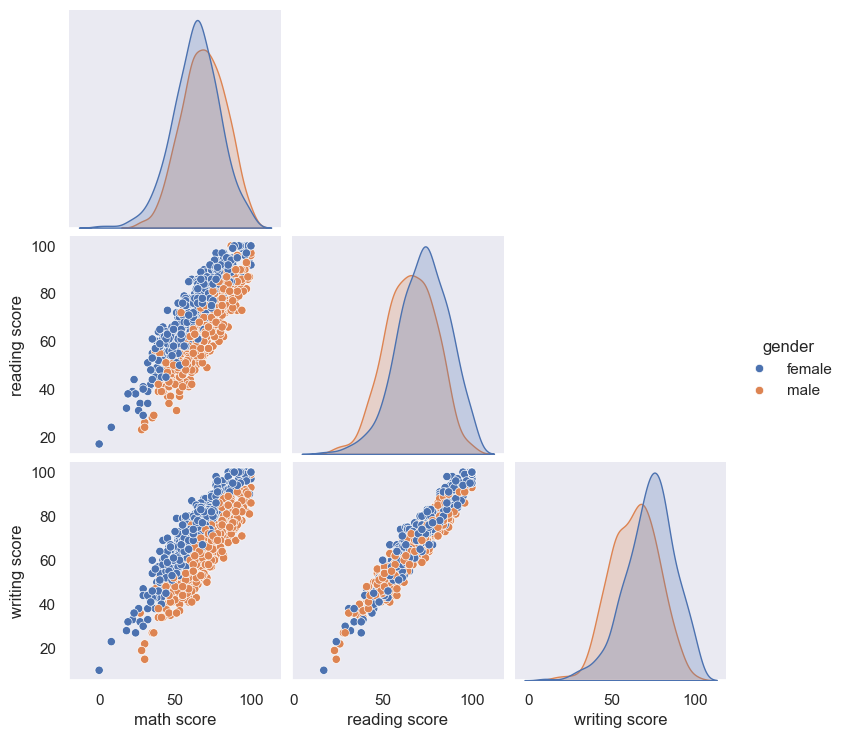

In [135]:
# sns.pairplot(df1, hue='gender', diag_kind='hist')
sns.pairplot(df1, hue='gender', corner=True)
plt.show()

# Seaborn Grids

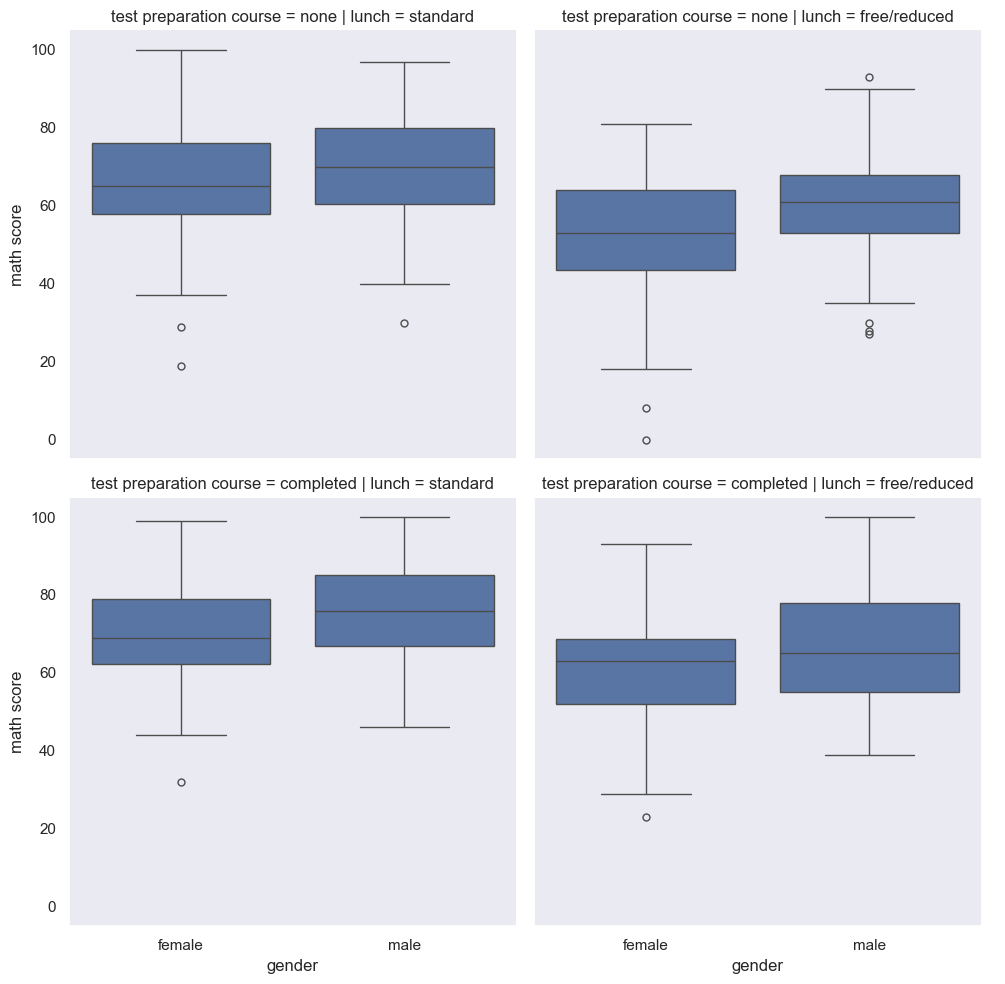

In [140]:
sns.catplot(data=df1, x='gender', y='math score', kind='box', col='lunch', row='test preparation course')
plt.show()

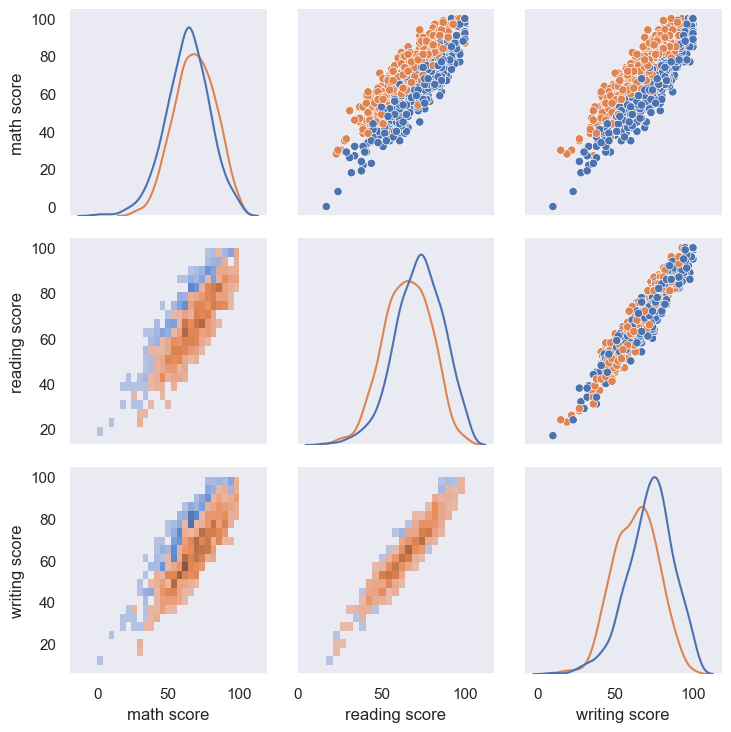

In [146]:
g = sns.PairGrid(df1, hue='gender')
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.histplot)
g = g.add_legend()

# Heat map and Cluster map

In [147]:
df2 = pd.read_csv('Resources/05-Seaborn/country_table.csv')
df2.head(1)

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.4


In [148]:
df2 = df2.set_index('Countries')

In [149]:
df2.head(1)

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.4


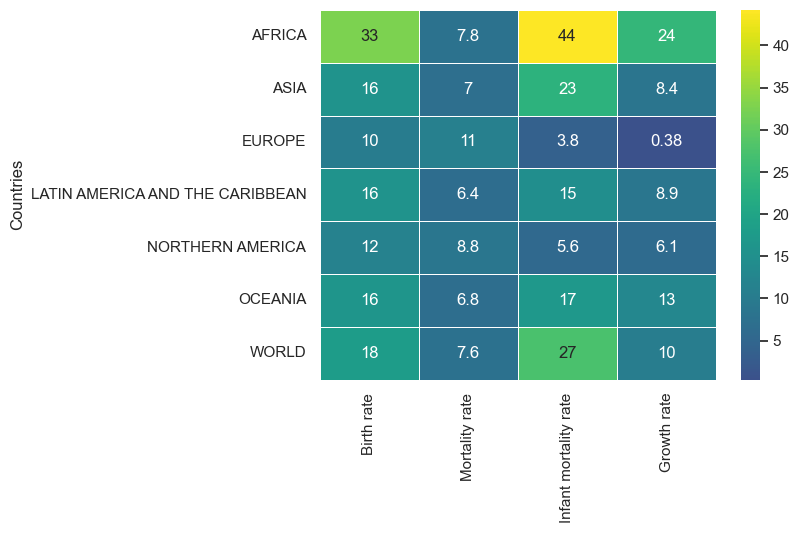

In [156]:
sns.heatmap(df2.drop('Life expectancy', axis=1), annot=True, lw=0.5, cmap='viridis')
plt.show()

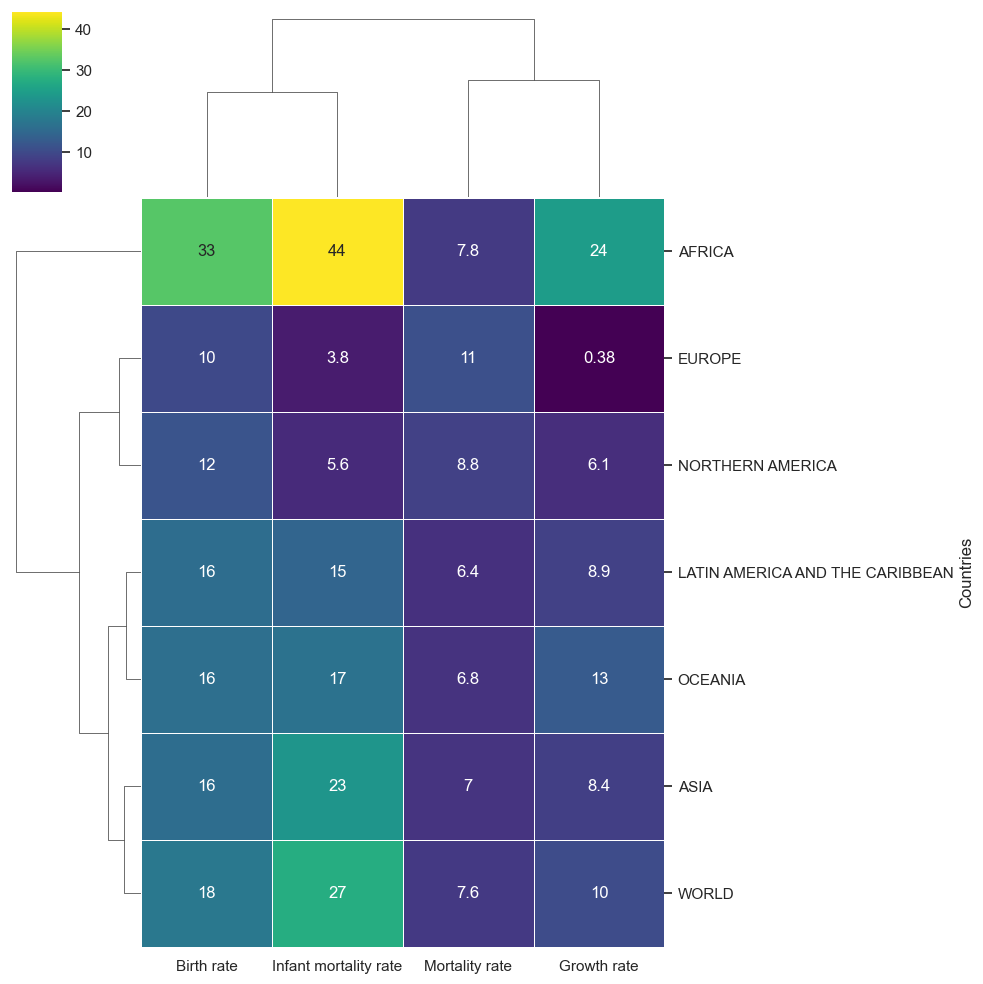

In [157]:
sns.clustermap(df2.drop('Life expectancy', axis=1), annot=True, lw=0.5, cmap='viridis')
plt.show()